# Data Cleaning with Python and Pandas

In this project, I discuss various useful techniques to clean a dataset with Python, NumPy and Pandas.

This project is divided into various sections. Each section does specific task.

## Table of Contents:-

1. Introduction to Python data cleaning  
&nbsp;  
2. Python data cleansing – prerequisites  
&nbsp;  
3. Import the required Python libraries  
&nbsp;  
4. The source dataset  
&nbsp;  
5. Exploratory data analysis (EDA)  
&nbsp;  
6. Visual exploratory data analysis (Visual EDA)  
&nbsp;  
7. Findings of EDA and Visual EDA  
&nbsp;  
8. Split the ‘age_sex’ column into two separate columns  
&nbsp;  
9. Reorder the column labels  
&nbsp;  
10. Dealing with negative numerical values  
&nbsp;  
11. Dealing with outliers  
&nbsp;  
12. Dealing with missing numerical values  
&nbsp;  
13. Check with ASSERT statement  
&nbsp;  
14. Project Conclusion  


## 1. Introduction to Python Cleaning

Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning, data mining models or even decision making are greatly affected because of poor quality of data.

So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

A very common scenario is that the dataset contains missing values coded as NaN. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset.

In this project, I present several useful ways to handle these discrepancies in the dataset.

## 2. Python data cleaning - Prerequisites

We need three Python libraries for the data cleansing process – NumPy, Pandas and Matplotlib.

• **NumPy** – NumPy is the fundamental Python library for scientific computing. It adds support for large and multi-dimensional arrays and matrices. It also supports large collection of high-level mathematical functions to operate on these arrays.

• **Pandas** - Pandas is a software library for Python programming language which provide tools for data manipulation and analysis tasks. It will enable us to manipulate numerical tables and time series using data structures and operations.

• **Matplotlib** - Matplotlib is the core data visualization library of Python programming language. It provides an object-oriented API for embedding plots into applications.

## 3. Import the required Python libraries

We have seen that we need three Python libraries – NumPy, Pandas and Matplotlib for the data cleaning process. We need to import these libraries before we actually start using them.

In [1]:
# importing the Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 4. The source dataset

For this project, I have created a fictious dataset. The dataset consists of details of 20 random people generated by ChatGPT.

The dataset imported from my local as follows:-

In [2]:
data = "/Users/kailash/Desktop/Spend_Analysis.csv"

df = pd.read_csv(data)

## 5. Exploratory data analysis

Now, it is time to understand the data. We should diagnose the data for any discrepancies by doing exploratory data analysis. As follows:-

### df.shape attribute

We can check the dimensions of the data with df.shape attribute.

In [3]:
df.shape

(20, 10)

we can see that our data have 20 rows and 10 columns.

### df.head() and df.tail() methods

We can view the top five and bottom five rows of the dataset with **df.head()** and **df.tail()** methods respectively.

In [4]:
df.head()

,First_Name,Last_Name,Age_Sex,Section,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C
0,Emily,Carter,25_F,A,165.4,58.2,25,250.75,320.5,180.2
1,James,Dawson,30_M,B,175.8,74.6,30,400.60,150.8,230.45
2,Olivia,Harper,28_F,A,NaN,xx,28,NaN,290.7,NaN
3,Ethan,Walker,22_M,C,180.5,80.3,22,200.00,500.5,300.25
4,Sophia,Hayes,24_F,B,167.3,62.4,24,280.30,320.2,250.15


In [5]:
df.tail()

,First_Name,Last_Name,Age_Sex,Section,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C
15,William,Clark,28_M,C,181,84.1,28,NaN,390.5,310.6
16,Charlotte,Hill,27_F,A,159.4,153.2,27,200.8,410.1,250.45
17,Henry,Lewis,33_M,B,177.5,79.3,33,280.5,320.4,xx
18,Lily,Young,26_F,C,161.7,58.4,26,410.2,200.3,290.15
19,Mason,King,35_M,A,186.3,88.5,35,450.4,350.5,400.25


We can see that there are lot of discrepancies in the dataset.

For example, the age and sex columns are combined together with an underscore. There should be two separate columns of age and sex.

The height and weight columns contain missing values. Some values are coded as "xx", "?", "0" and negative values. They are all invalid values as height and weight must be positive real numbers.

The three columns spend_A, spend_B and spend_C denote spending at three supermarkets A,B and C. These columns must contain positive real numbers. The missing values in these columns denote nothing spend in that market. The negative value and the value coded as "xx" should be addressed properly.

### df.info() method

We can get a concise summary of the dataset with df.info() method. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   First_Name  20 non-null     object 
 1   Last_Name   20 non-null     object 
 2   Age_Sex     20 non-null     object 
 3   Section     20 non-null     object 
 4   Height(cm)  19 non-null     object 
 5   Weight(kg)  20 non-null     object 
 6   Age         20 non-null     int64  
 7   Spend_A     18 non-null     float64
 8   Spend_B     19 non-null     float64
 9   Spend_C     17 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.7+ KB


We can see that this method prints information of all columns. Several columns contain missing values. We have seen that columns contain missing and invalid values are coded differently. So, we need to explore this issue further.

### df.dtypes attribute

We can check the data types of each column in the dataframe with df.dtypes attribute. The above command returns the data type of each column.

In [7]:
df.dtypes

First_Name     object
Last_Name      object
Age_Sex        object
Section        object
Height(cm)     object
Weight(kg)     object
Age             int64
Spend_A       float64
Spend_B       float64
Spend_C        object
dtype: object

Also, we can see that data types of height(cm) and weight(kg) columns are object data type. Again this is not true. The columns height(cm) and weight(kg) must contain positive real numbers. So, their data type must be float64.

Also, spend_A, spend_B and spend_C columns must contain numeric values. We can see that the data type of spend_A and spend_B columns are float64. But the data type of column spend_C is object. So, we need to convert its data type to float64.

### Handling invalid values

There is an invalid value coded as "xx" in the height(cm) column. We can coerce invalid values to "NaN" using the errors keyword as follows:-

In [8]:
df["Height(cm)"] = pd.to_numeric(df["Height(cm)"], errors='coerce')

Similary, there is an invalid value coded as "xx" in the weight(kg) column. Again, we can coerce it using the errors keyword as follows:-

In [9]:
df["Weight(kg)"] = pd.to_numeric(df["Weight(kg)"], errors='coerce')

Similary, there is an invalid value coded as "xx" in the spend_C column. Again, we can coerce it using the errors keyword as follows:-

In [10]:
df["Spend_C"] = pd.to_numeric(df["Spend_C"], errors='coerce')

### Check the data type again with df.dtypes

In [11]:
df.dtypes

First_Name     object
Last_Name      object
Age_Sex        object
Section        object
Height(cm)    float64
Weight(kg)    float64
Age             int64
Spend_A       float64
Spend_B       float64
Spend_C       float64
dtype: object

Now, we can see that all the columns have appropriate data types. The columns height(cm) and weight(kg) have float64 data type. The columns spend_A, spend_B and spend_C have float64 data type.

In [12]:
df.head()

,First_Name,Last_Name,Age_Sex,Section,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C
0,Emily,Carter,25_F,A,165.4,58.2,25,250.75,320.5,180.20
1,James,Dawson,30_M,B,175.8,74.6,30,400.60,150.8,230.45
2,Olivia,Harper,28_F,A,NaN,NaN,28,NaN,290.7,NaN
3,Ethan,Walker,22_M,C,180.5,80.3,22,200.00,500.5,300.25
4,Sophia,Hayes,24_F,B,167.3,62.4,24,280.30,320.2,250.15


In [13]:
df.tail()

,First_Name,Last_Name,Age_Sex,Section,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C
15,William,Clark,28_M,C,181.0,84.1,28,NaN,390.5,310.60
16,Charlotte,Hill,27_F,A,159.4,153.2,27,200.8,410.1,250.45
17,Henry,Lewis,33_M,B,177.5,79.3,33,280.5,320.4,NaN
18,Lily,Young,26_F,C,161.7,58.4,26,410.2,200.3,290.15
19,Mason,King,35_M,A,186.3,88.5,35,450.4,350.5,400.25


We can see that all the invalid values(the values coded as "xx") and missing values are now coded as "NaN". The use of the keyword errors='coerce' enable us to convert all the invalid values into NaN.

### df.describe() method

We can view the summary statistics of numerical columns with df.describe() method. It enable us to detect outliers in the data which require further investigation.

In [14]:
df.describe()

,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C
count,18.000000,18.000000,20.000000,18.000000,19.000000,16.000000
mean,161.333333,67.877778,27.750000,306.555556,293.039474,270.375000
std,41.336695,39.312123,3.931988,86.058149,154.013990,76.021229
min,0.000000,-60.200000,21.000000,180.300000,-220.100000,150.400000
25%,161.950000,58.250000,25.000000,243.250000,230.450000,220.225000
50%,170.050000,75.000000,27.500000,290.375000,320.200000,270.300000
75%,178.175000,82.025000,30.250000,392.625000,380.350000,315.562500
max,186.300000,153.200000,35.000000,450.400000,500.500000,400.500000


We can see that there are discrepancies in Height(cm) and Weight(kg) columns.

The minimum value of Height(cm) is 0. It is not possible because height cannot be 0.

The minimum and maximum values of Weight(kg) are -60 and 153. Weight cannot be negative and weight cannot be as high as 153. So, both are invalid values.

They are outliers and need to be properly addressed.

### df.columns attribute

We can get the column labels of the dataframe with df.columns attribute.

In [15]:
df.columns

Index(['First_Name', 'Last_Name', 'Age_Sex', 'Section', 'Height(cm)',
       'Weight(kg)', 'Age', 'Spend_A', 'Spend_B', 'Spend_C'],
      dtype='object')

## 6. Visual Exploratory Data Analysis

Now, we should conduct data visualization to find discrepancies in the data. Data visualization is a great way to find errors in the data and detect outliers. They help us to detect patterns in the data.

We can use various types of plots for data visualization purpose. These plots are listed below:-

• **Bar plot**

• **Histograms**

• **Box plot**

• **Scatter plot**

### Bar plot

A bar plot is a plot that presents data with rectangular bars with lengths proportional to the values that they represent.

We can plot a bar plot of the age column as follows:-

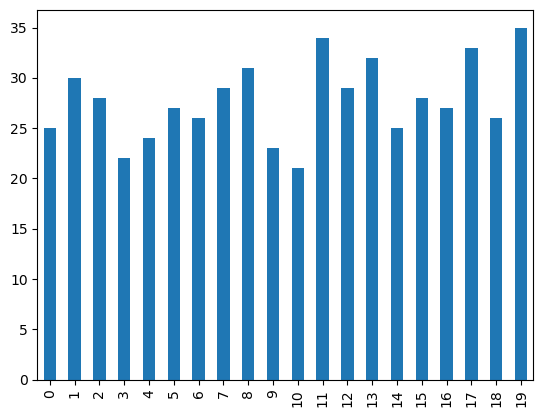

In [16]:
df['Age'].plot(kind='bar')

plt.show()

The bar plot shows that there are 20 counts of the age label. So, there are no missing values in the age column.

### Histograms

We use histograms for plotting continuous data counts. A histogram is a representation of the distribution of data.

In this case, we use histograms for plotting distribution of data values of height(cm) and weight(kg) columns.

We can draw a histogram as follows:-

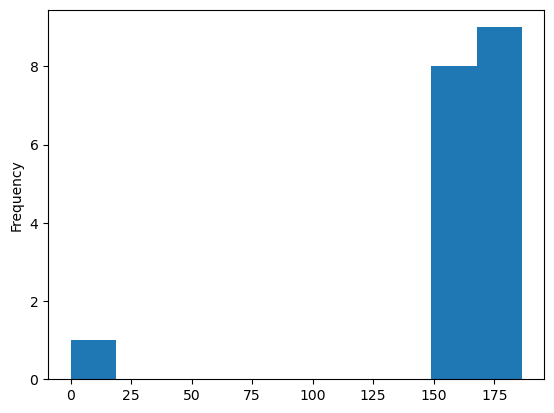

In [17]:
df['Height(cm)'].plot(kind='hist')

plt.show()

The above histogram shows that there is a data value between 0 and 25. When we take a closer look , we find that there is a value of 0.0 in the height(cm) column. It is not possible as height cannot be 0. So, we need to take care of that.

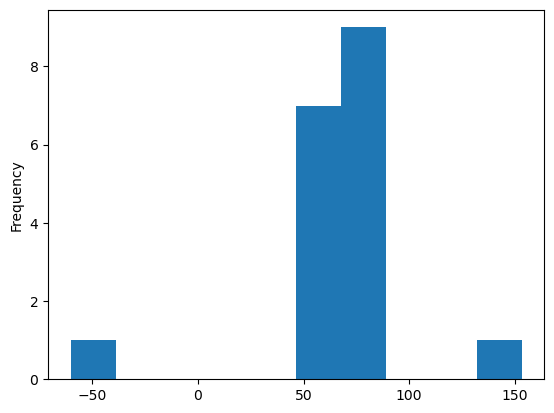

In [18]:
df['Weight(kg)'].plot(kind='hist')

plt.show()

Similar analysis of histogram of weight(kg) column shows that there is a negative value of -60 and a very high value of 153 in the weight(kg) column. Both are invalid values. Weight cannot be negative and also weight cannot be so high. So, we need to take care of these invalid values.

### Box plot

We can visualize basic summary statistics with box plot. Box plot let us to detect outliers in the data. They help us to find minimum and maximum values. They present 25th, 50th, 75th percentiles. 50th percentile value is the median value.

We can draw a boxplot as follows:-

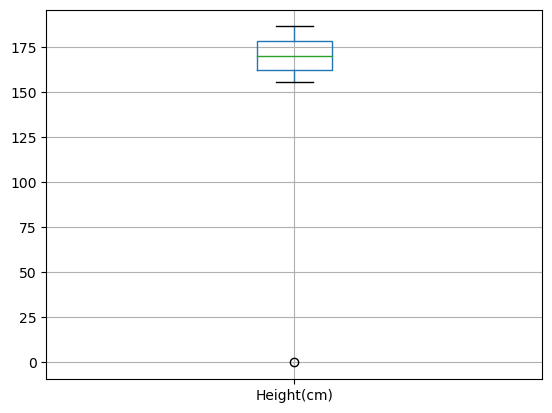

In [19]:
df.boxplot(column='Height(cm)')

plt.show()

I have drawn the boxplot of the height(cm) column in the above cell. It confirms that there is a value of 0.0 in the height(cm) column. It is not possible as height cannot be 0. So, we need to take care of that.

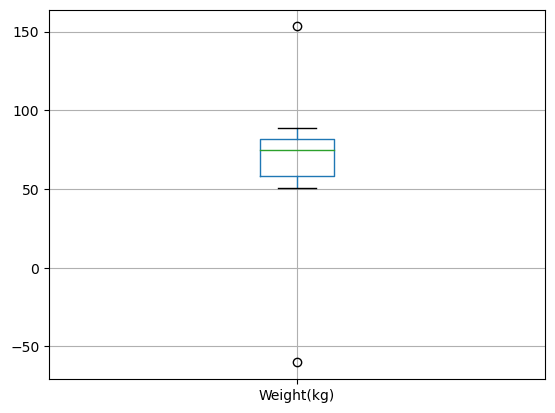

In [20]:
df.boxplot(column='Weight(kg)')

plt.show()

I have drawn the boxplot of the weight(kg) column in the above cell. The above boxplot confirms our findings that there is a negative value of -60 and a very high value of 153 in the weight(kg) column.

Both are invalid values. Weight cannot be negative and also weight cannot be so high. So, we need to take care of these invalid values.

### Scatter plot 

Scatter plot help us to explore relationship between two numeric variables. it help us to identify potentially bad data.

We can draw a scatter plot of Height(cm) and Weight(kg) column as follows:-

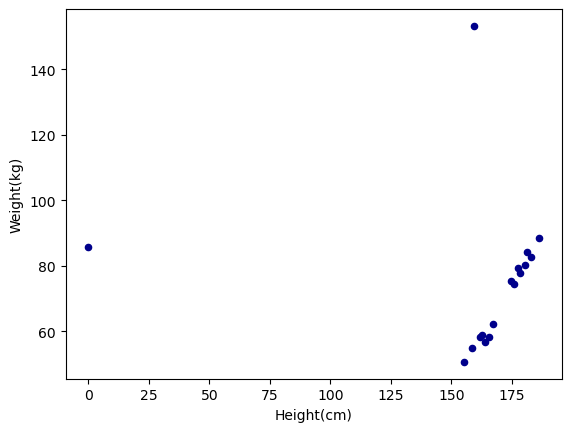

In [21]:
df.plot(kind='scatter',x='Height(cm)', y='Weight(kg)', c='DarkBlue')

plt.show()

The above scatter plot does not depict anything due to lack of data values. We need more data to identify relationship or pattern between data values.

## 7. Findings of EDA and Visual EDA

We can summarize the findings of EDA and visual EDA as follows:-

1. The Dataset has 20 rows and 10 columns.<br>
<br>
2. The Age and Sex columns are combined together with an underscore.<br>
<br>
3. All the invalid values (coded as 'xx') and missing values in Height(cm), Weight(kg), Spend_A, Spend_B and Spend_c throughout the dataset are coded as NaN.<br>
<br>
4. The data types of columns Height(cm), Weight(kg) and Spend_C are converted in Float64.<br>
<br>
5. In Height(cm) column, there is value of 0.0. Which is not possible as height cannot be 0. We need to resolve it.<br>
<br>
6. In Weight(kg) column, there is -60 and a very high value of 153 both are invalid, we need to resolve the issue.<br>
<br>
7. The three columns Spend_A, Spend_B and Spend_C can be taken as three sections or super markets, the values must contain positive real numbers. The missing values in these columns denote nothing spent in that particular section. We need to handle these missing values properly.<br>
<br>
8. In Spend_B column, there is a negative value -220. The amount spent cannot be negative. So, we need to take care of that as well.<br>

## 8. Split ‘age_sex’ column

We should split the 'Age_Sex' column into two separate columns Age and Sex.

We can do this using the df.str.split() function as follows:-

In [22]:
df[['Age','Sex']] = df.Age_Sex.str.split("_", expand = True)

In [23]:
df.head()

,First_Name,Last_Name,Age_Sex,Section,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C,Sex
0,Emily,Carter,25_F,A,165.4,58.2,25,250.75,320.5,180.20,F
1,James,Dawson,30_M,B,175.8,74.6,30,400.60,150.8,230.45,M
2,Olivia,Harper,28_F,A,NaN,NaN,28,NaN,290.7,NaN,F
3,Ethan,Walker,22_M,C,180.5,80.3,22,200.00,500.5,300.25,M
4,Sophia,Hayes,24_F,B,167.3,62.4,24,280.30,320.2,250.15,F


We can see that now we have two separate columns for Age and Sex.

Now, there is no need for the Age_Sex column. So, we should drop that column.

We can drop 'Age_Sex' column using the df.drop() method as follows:-

In [24]:
df.drop(['Age_Sex'], axis=1, inplace=True)

In [25]:
df

,First_Name,Last_Name,Section,Height(cm),Weight(kg),Age,Spend_A,Spend_B,Spend_C,Sex
0,Emily,Carter,A,165.4,58.2,25,250.75,320.50,180.20,F
1,James,Dawson,B,175.8,74.6,30,400.60,150.80,230.45,M
2,Olivia,Harper,A,NaN,NaN,28,NaN,290.70,NaN,F
3,Ethan,Walker,C,180.5,80.3,22,200.00,500.50,300.25,M
4,Sophia,Hayes,B,167.3,62.4,24,280.30,320.20,250.15,F
5,Benjamin,Moore,A,172.8,NaN,27,350.40,-220.10,400.50,M
6,Isabella,Turner,C,158.6,54.8,26,420.75,210.40,190.30,F
7,Michael,Bennett,A,0.0,85.7,29,300.25,450.50,NaN,M
8,Daniel,Scott,B,178.4,77.9,31,250.80,370.20,330.45,M
9,Sarah,Reed,C,162.7,59.0,23,310.40,NaN,180.50,F


We can see that the 'Age_Sex' column has been dropped from the dataframe.

## 9. Reorder the column lables

We can reorder the columns for more pleasing visual appearance.

We can do it as follows:-

In [26]:
df = df[['First_Name','Last_Name','Age','Sex','Section','Height(cm)','Weight(kg)','Spend_A','Spend_B','Spend_C']]

In [27]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.4,58.2,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.8,74.6,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,NaN,NaN,NaN,290.70,NaN
3,Ethan,Walker,22,M,C,180.5,80.3,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.3,62.4,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.8,NaN,350.40,-220.10,400.50
6,Isabella,Turner,26,F,C,158.6,54.8,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,0.0,85.7,300.25,450.50,NaN
8,Daniel,Scott,31,M,B,178.4,77.9,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.7,59.0,310.40,NaN,180.50


Now, we can move forward to deal with missing and negative numerical values.

## 10. Dealing with negative numerical values

We have seen that, in the weight(kg) column, there is a negative value of -60.2. It is invalid value because weight cannot be negative. There is a high probability that weight is 60 kg and it is mistyped as -60. So, I will replace the negative value of -60.2 with positive value of 60.2.

We can do the same as follows:-

In [28]:
# Suppress settingwithcopywarning

pd.set_option('mode.chained_assignment', None)

In [29]:
df['Weight(kg)'].replace(-60.2, 60.2, inplace=True)

In [30]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.4,58.2,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.8,74.6,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,NaN,NaN,NaN,290.70,NaN
3,Ethan,Walker,22,M,C,180.5,80.3,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.3,62.4,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.8,NaN,350.40,-220.10,400.50
6,Isabella,Turner,26,F,C,158.6,54.8,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,0.0,85.7,300.25,450.50,NaN
8,Daniel,Scott,31,M,B,178.4,77.9,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.7,59.0,310.40,NaN,180.50


We can see that the negative value of -60.2 is replaced with positive value of 60.2.

Similarly, in the spend_B column, there is a negative value -220.10. The amount spent cannot be negative. So, we need to replace this negative value of -220.10 with positive value of 220.10.

We can do it as follows:-

In [31]:
df['Spend_B'].replace(-220.10, 220.10, inplace=True)

In [32]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.4,58.2,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.8,74.6,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,NaN,NaN,NaN,290.70,NaN
3,Ethan,Walker,22,M,C,180.5,80.3,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.3,62.4,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.8,NaN,350.40,220.10,400.50
6,Isabella,Turner,26,F,C,158.6,54.8,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,0.0,85.7,300.25,450.50,NaN
8,Daniel,Scott,31,M,B,178.4,77.9,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.7,59.0,310.40,NaN,180.50


Again, we can see that the negative value of -220.10 in Spend_B column is replaced with positive value of 220.10.

## 11. Dealing with outliers

In the Height(cm) column, there is a value of 0.0. It is not possible as height cannot be 0. So, we need to resolve it.

I will replace the 0.0 value with the mean of the Height(cm) column. It can be done as follows:-

In [33]:
mean = df['Height(cm)'].mean()

In [34]:
df['Height(cm)'].replace(0.0, mean, inplace=True)

In [35]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.400000,58.2,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.800000,74.6,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,NaN,NaN,NaN,290.70,NaN
3,Ethan,Walker,22,M,C,180.500000,80.3,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.300000,62.4,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.800000,NaN,350.40,220.10,400.50
6,Isabella,Turner,26,F,C,158.600000,54.8,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,161.333333,85.7,300.25,450.50,NaN
8,Daniel,Scott,31,M,B,178.400000,77.9,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.700000,59.0,310.40,NaN,180.50


We can see that the data value of 0.0 in height(cm) column is replaced by a proper height value.

But, there are 6 characters after the decimal. To decrease the number of characters after the decimal point for all rows in a column, you can use the round() method in pandas. 

We can do the same as follows:-

In [36]:
df['Height(cm)'] = df['Height(cm)'].round(2)

In [37]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.40,58.2,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.80,74.6,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,NaN,NaN,NaN,290.70,NaN
3,Ethan,Walker,22,M,C,180.50,80.3,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.30,62.4,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.80,NaN,350.40,220.10,400.50
6,Isabella,Turner,26,F,C,158.60,54.8,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,161.33,85.7,300.25,450.50,NaN
8,Daniel,Scott,31,M,B,178.40,77.9,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.70,59.0,310.40,NaN,180.50


In the Weight(kg) column, there is a very high absurd value of 153.2. It is not possible to have so much weight. Hence, it is invalid value. There is a high chance that the weight is 53.2 kg and it is mistakenly typed as 153.2 kg. So, I will replace the 153.2 data value with 53.2.

It can be done as follows:-

In [38]:
df['Weight(kg)'].replace(153.2, 53.2, inplace=True)

In [39]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.40,58.2,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.80,74.6,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,NaN,NaN,NaN,290.70,NaN
3,Ethan,Walker,22,M,C,180.50,80.3,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.30,62.4,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.80,NaN,350.40,220.10,400.50
6,Isabella,Turner,26,F,C,158.60,54.8,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,161.33,85.7,300.25,450.50,NaN
8,Daniel,Scott,31,M,B,178.40,77.9,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.70,59.0,310.40,NaN,180.50


We can see that the data value of 153.2 in the weight(kg) column is replaced by 53.2.

## 12. Dealing with missing numerical values

The following commands help us to deal with missing numerical values;

df.isnull( ):

This command checks whether each cell in a DataFrame contains a missing value (such as NaN or None). If the cell is missing a value, it returns True; otherwise, it returns False.

df.isnull( ).sum( ):

This command sums up the number of missing values in each column of the DataFrame. It returns the total count of missing values per column.

df.isna( ):

Similar to isnull( ), this command checks if each cell in a DataFrame is missing a value. It returns True for missing values and False for non-missing values.

df.notna( ):

This command is the opposite of isna( ). It checks if each cell contains a non-missing value. It returns True for cells with values and False for missing values.

df['col_name'].isna( ).sum( ):

This command counts how many missing values exist in a specific column (col_name) of the DataFrame. It returns the total number of missing values in that column.

So, we can check the number of missing values in each column in the dataset as follows:-

In [40]:
df.isnull().sum()

First_Name    0
Last_Name     0
Age           0
Sex           0
Section       0
Height(cm)    2
Weight(kg)    2
Spend_A       2
Spend_B       1
Spend_C       4
dtype: int64

We can see that there are lots of missing values in the dataset.

### Fill missing values with a test statistic

In this method, we fill the missing values with a test statistic like mean, median or mode of the particular feature the missing value belongs to. One can also specify a forward-fill or back-fill to propagate the next values backward or previous value forward.

### Filling missing values with a test statistic like mean

mean = df [ 'col_name' ].mean( )

df [ 'col_name' ].fillna ( value = median, inplace = True )

### We can also use replace( ) in place of fillna( )

df [ ‘col_name’ ].replace( to_replace = NaN, value = median, inplace = True )

If we choose this method, then we should compute the median value on the training set and use it to fill the missing values in the training set. Then we should save the median value that we have computed. Later, we will replace missing values in the test set with the median value to evaluate the system.

We can calculate the missing variables and use it to fill the missing values as follows:-

In [41]:
mean_height = df['Height(cm)'].mean()

df['Height(cm)'].fillna(mean_height, inplace=True)

In [42]:
mean_weight = df['Weight(kg)'].mean()

df['Weight(kg)'].fillna(mean_weight, inplace=True)

In [43]:
mean_spend_A = df['Spend_A'].mean()

df['Spend_A'].fillna(mean_spend_A, inplace=True)

In [44]:
mean_spend_B = df['Spend_B'].mean()

df['Spend_B'].fillna(mean_spend_B, inplace=True)

In [45]:
mean_spend_C = df['Spend_C'].mean()

df['Spend_C'].fillna(mean_spend_C, inplace=True)

We have calculated the mean variables and use them to fill the missing values.

In [46]:
# Again checking for missing values

df.isnull().sum()

First_Name    0
Last_Name     0
Age           0
Sex           0
Section       0
Height(cm)    0
Weight(kg)    0
Spend_A       0
Spend_B       0
Spend_C       0
dtype: int64

We can see that there are no missing values in the dataframe.

We can confirm this with ASSERT statement as follwos:-

## 13. Check with ASSERT statement

Finally, we can check for missing values. If we drop or fill missing values, we expect no missing values. We can write an assert statement to verify this. So, we can use an assert statement to programmatically check that no missing or unexpected ‘0’ value is present. This gives confidence that our code is running properly.

Assert statement will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

Asserts

• assert 1 == 1 (return Nothing if the value is True)

• assert 1 == 2 (return AssertionError if the value is False)

We can check with assert statement as follows:-

In [47]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

In [48]:
#assert all values are greater than 0

assert (df.select_dtypes(include=['number']) > 0).all().all()

The assert statement returns nothing. So, we can conclude that there are no missing values in the dataset and all the values are greater than zero.

We can confirm this by looking at the dataframe.

In [49]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.400000,58.200000,250.750000,320.500000,180.200
1,James,Dawson,30,M,B,175.800000,74.600000,400.600000,150.800000,230.450
2,Olivia,Harper,28,F,A,170.296111,69.011111,306.555556,290.700000,270.375
3,Ethan,Walker,22,M,C,180.500000,80.300000,200.000000,500.500000,300.250
4,Sophia,Hayes,24,F,B,167.300000,62.400000,280.300000,320.200000,250.150
5,Benjamin,Moore,27,M,A,172.800000,69.011111,350.400000,220.100000,400.500
6,Isabella,Turner,26,F,C,158.600000,54.800000,420.750000,210.400000,190.300
7,Michael,Bennett,29,M,A,161.330000,85.700000,300.250000,450.500000,270.375
8,Daniel,Scott,31,M,B,178.400000,77.900000,250.800000,370.200000,330.450
9,Sarah,Reed,23,F,C,162.700000,59.000000,310.400000,316.207895,180.500


We can see that there are no missing or negative values in the dataframe.

But, there are 6 characters after the decimal. To decrease the number of characters after the decimal point, we can use the round() method in pandas as done above for the Height(cm).

We can do the same as follows:-

In [50]:
# Rounding columns to 2 decimal places

df[['Height(cm)', 'Weight(kg)', 'Spend_A', 'Spend_B', 'Spend_C']] = df[['Height(cm)', 'Weight(kg)', 'Spend_A', 'Spend_B', 'Spend_C']].round(2)

In [51]:
df

,First_Name,Last_Name,Age,Sex,Section,Height(cm),Weight(kg),Spend_A,Spend_B,Spend_C
0,Emily,Carter,25,F,A,165.40,58.20,250.75,320.50,180.20
1,James,Dawson,30,M,B,175.80,74.60,400.60,150.80,230.45
2,Olivia,Harper,28,F,A,170.30,69.01,306.56,290.70,270.38
3,Ethan,Walker,22,M,C,180.50,80.30,200.00,500.50,300.25
4,Sophia,Hayes,24,F,B,167.30,62.40,280.30,320.20,250.15
5,Benjamin,Moore,27,M,A,172.80,69.01,350.40,220.10,400.50
6,Isabella,Turner,26,F,C,158.60,54.80,420.75,210.40,190.30
7,Michael,Bennett,29,M,A,161.33,85.70,300.25,450.50,270.38
8,Daniel,Scott,31,M,B,178.40,77.90,250.80,370.20,330.45
9,Sarah,Reed,23,F,C,162.70,59.00,310.40,316.21,180.50


The dataset is now clean, organized, and free of errors. It’s ready to be used for analysis, visualization, or modeling in the next steps.

## 14. Project Conclusion

As shown in the project, through systematic techniques like data inspection, transformation, and validation, this project demonstrates how to convert messy, incomplete, or inconsistent data into a structured format ready for analysis. These steps not only improve the quality of the data but also save significant time and effort in downstream processes like visualization, statistical modeling, and machine learning.

Ultimately, effective data cleaning enhances the accuracy of insights and the reliability of decisions drawn from data. Whether addressing business challenges, conducting research, or developing predictive models, clean and well-prepared data forms the foundation for success. By mastering these techniques, analysts and data scientists can confidently tackle real-world data problems and unlock the full potential of their datasets.